In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sct

## データを読み込んで表示

In [3]:
data = pd.read_csv("chap_2_data.csv",names=['id', 'x'])
data

,id,x
0,0,2
1,1,2
2,2,4
3,3,6
4,4,4
5,5,5
6,6,2
7,7,3
8,8,1
9,9,2


## データ個数を数える

In [6]:
len(data)

50

## データを要約する

In [8]:
data.describe()

,id,x
count,50.00000,50.00000
mean,24.50000,3.56000
std,14.57738,1.72804
min,0.00000,0.00000
25%,12.25000,2.00000
50%,24.50000,3.00000
75%,36.75000,4.75000
max,49.00000,7.00000


## 度数分布を作成

In [12]:
np.histogram(data['x'],bins=7)

(array([ 1,  3, 11, 12, 10,  5,  8], dtype=int64),
 array([0., 1., 2., 3., 4., 5., 6., 7.]))

# ヒストグラムで図示

(array([ 1.,  3., 11., 12., 10.,  5.,  4.,  4.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <BarContainer object of 8 artists>)

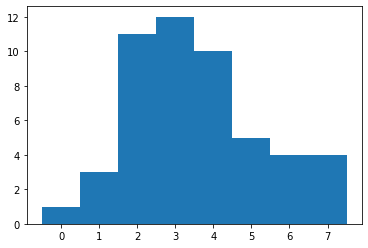

In [6]:
plt.hist(data['x'],bins=np.arange(-0.5,8.5,1))

# 標本分散

In [7]:
data['x'].var(ddof=0) # 標本分散

2.9264000000000006

In [10]:
data['x'].var(ddof=1) # 不偏分散

2.986122448979592

In [11]:
np.var(data['x']) #　標本分散

2.9264000000000006

In [12]:
np.var(data['x'],ddof=1) #　不偏分散

2.986122448979592

# 標準偏差

In [13]:
data['x'].std()

1.728040060004279

In [14]:
np.sqrt(data['x'].var())

1.728040060004279

# とりあえずポアソン分布を仮定して、平均3.56のポアソン分布を作成する

In [15]:
# x軸の範囲を作成
y = range(10)

# x軸の範囲と、ポアソン分布のλを指定してやる。scipy.statsにより
# ポアソン分布でとる値をprobに格納

prob = sct.poisson.pmf(y, mu=3.56)
prob

array([0.02843882, 0.10124222, 0.18021114, 0.21385056, 0.190327  ,
       0.13551282, 0.08040427, 0.04089132, 0.01819664, 0.00719778])

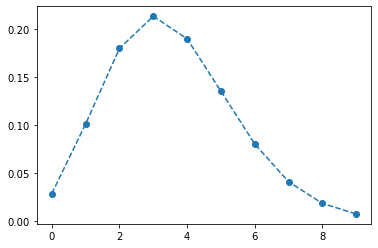

In [17]:
plt.plot(y,prob,"o--")

# ヒストグラムとポアソン分布を重ねて表示

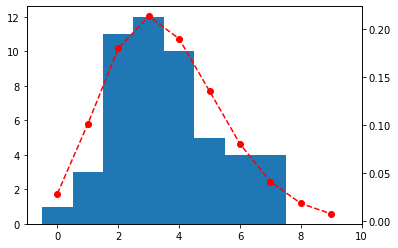

In [25]:
fig,ax1 = plt.subplots()

ax1.hist(data['x'],bins=[i-0.5 for i in range(11)])

ax2 = ax1.twinx()
ax2.plot(y,prob,"ro--")

plt.show()

上記より
- 仮定したポアソン分布でよい当てはまりになりそうだ

という感覚を得る
次に知りたいことは、上記の感覚を定量的に確認すること。具体的には
- どのような確率分布/統計モデルを使って観測データを説明できるか
- 確率分布のパラメータはどう決めるがよいか
- 観測データを説明できる統計モデルは何か

→定量的に分布のパラメータやモデルを決めたうえで、確率分布、統計モデルを策定したい

# 今回のデータにおいてポアソン分布を検討する理由
- $ y_i $が非負の整数である
- $ y_i $の下限（0）は存在するが、上限は不明
- 平均(3.56)と分散(2.99)が大体同じくらいの値をとる ← ポアソン分布の性質！

最尤推定によって、ポアソン分布のパラメータλを推定する。
手順
- ポアソン分布の仮定の下、尤度関数を作成
- 尤度関数において、最大尤度となるλを推定したい
- 具体的には、尤度関数に対してλで偏微分し、0となるλを求める

今回の場合
$$
\begin{equation*}
\begin{align}

尤度関数 : L(λ) &= \prod_{i=1}^{n}\frac{λ^{y_i}e^{-λ}}{y!} \\
対数尤度関数 : logL(λ) &= \sum_{i=1}^{n}(y_ilogλ- λ - \sum_{i=k}^{yi}logk) \\
\frac{\partial logL(λ)}{\partial λ} &= \sum_{i=1}^{n}y_ilogλ - nλ \\
\therefore \quad \hat{λ} &= \bar{y}
\end{align}
\end{equation*}
$$

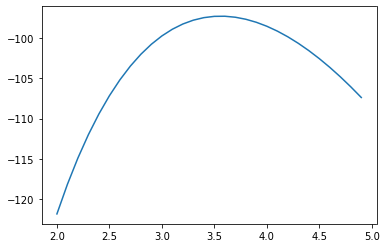

In [26]:
logL = lambda m: sum(sct.poisson.logpmf(data['x'],m))
x = np.arange(2,5,0.1)
logL_list = [logL(m) for m in x]
plt.plot(x,logL_list)

**対数尤度関数に対してλを2から5まで変化したとき、最大尤度をとるのは、最尤推定値である標本平均3.56であると確認できる。**\
実際の例では、こんなにきれいに見つからないので、数値的な試行錯誤によって見つけ出す。

# 疑似乱数と最尤推定値のばらつき

**ポアソン乱数を発生させる**
- 平均3.5のポアソン乱数を50個発生させる

(array([ 3.,  2.,  7., 14., 11.,  5.,  2.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <BarContainer object of 7 artists>)

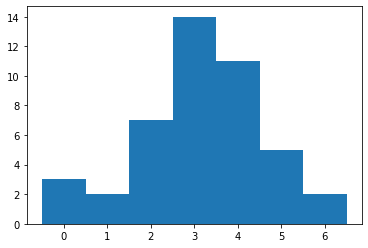

In [31]:
a = np.random.poisson(lam=3.5, size=50)
d = pd.Series(a)

plt.hist(d,bins=np.arange(d.max())-0.5)

上記で発生させた乱数の平均を確認

In [32]:
d.mean()

3.68

- 平均を3.5で発生させたポアソン乱数だが、上記の通りばらつきが発生する。

**ランダムに最尤推定値を3000回計算する**
- 平均値が3.5のポアソン乱数を50回発生させる
- その平均（最尤推定値）をとる。
- 3000回繰り返す

(0.15, 510.3)

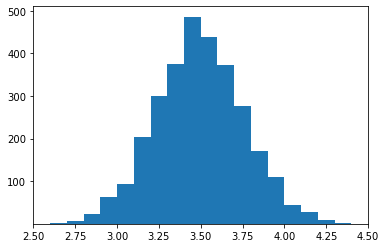

In [33]:
count = list()
for _ in range(3000):
    a = np.random.poisson(lam=3.5, size=50)
    count.append(a.mean())
    
plt.hist(count,bins=np.arange(2.5,4.5,0.1))
plt.xlim(2.5,4.5)
plt.ylim(0.1500)

- 平均が3.5のポアソン乱数を発生させているので、最尤推定値も3.5になるはずだが、ばらつきがある。
- ばらつきは標本が50しかないことが理由
- ばらつきのことを標準誤差とよび、標本が大きいほど、この誤差は小さくなる

**↓標本サイズを10倍にすると…**

(0.15, 1222.2)

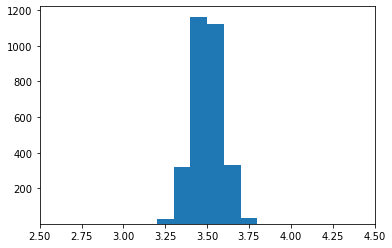

In [34]:
count = list()
for _ in range(3000):
    a = np.random.poisson(lam=3.5, size=500)
    count.append(a.mean())
    
plt.hist(count,bins=np.arange(2.5,4.5,0.1))
plt.xlim(2.5,4.5)
plt.ylim(0.1500)

# 統計学的な考え方
- ばらつきのある観測データを見たとき、『特定の確率分布から』乱数が発生して、サンプリングされていると考える。
- 特定の確率分布を仮定し、パラメータを推定し、未知のデータの予測をする

# 確率分布の選び方
- 説明量は離散か連続か？
- 説明量の範囲は?
- 説明量の標本分散と標本平均の関係は?

例
1. 離散型
- ポアソン分布
範囲 : 0以上,平均と分散の関係 : 平均 ≒ 分散
- 二項分布
範囲 : 0以上で有限の範囲,平均と分散の関係 : 分散が平均の関数

2. 連続型
- 正規分布
範囲 : [-∞, +∞],平均と分散の関係 : 無関係
- ガンマ分布
範囲 : [0, +∞],平均と分散の関係 : 分散が平均の関数